# Import necessary libraries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

In [210]:
path = "loan_prediction/train.csv"

try:
    loan_data = pd.read_csv(path)
except Exception as e:
    print(f"Error: {e}")

# Dataset information

# Initial information about the dataset

In [211]:
loan_data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [212]:
print(f"Number of rows: {loan_data.shape[0]}")
print(f"Number of columns: {loan_data.shape[1]}")
print(f"Number of elements: {loan_data.shape[0] * loan_data.shape[1]}")
print(f"Dimension: {loan_data.ndim}")

Number of rows: 614
Number of columns: 13
Number of elements: 7982
Dimension: 2


In [213]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [214]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [215]:
loan_data.describe(include=['object'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Data exploration (EDA)

# Data visualization

## 1) Graphical analysis

In [216]:
loan_data = loan_data.drop(["Loan_ID"], axis=1)
print("Delete the variable Loan_ID")

Delete the variable Loan_ID


In [217]:
## numerical variables
numeric_columns = [col for col in loan_data.select_dtypes(include=['float64'])]
categoric_columns = [col for col in loan_data.select_dtypes(include=['object'])]

print(f"Numerical column: {numeric_columns}")
print(f"Categorical column: {categoric_columns}")

Numerical column: ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical column: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


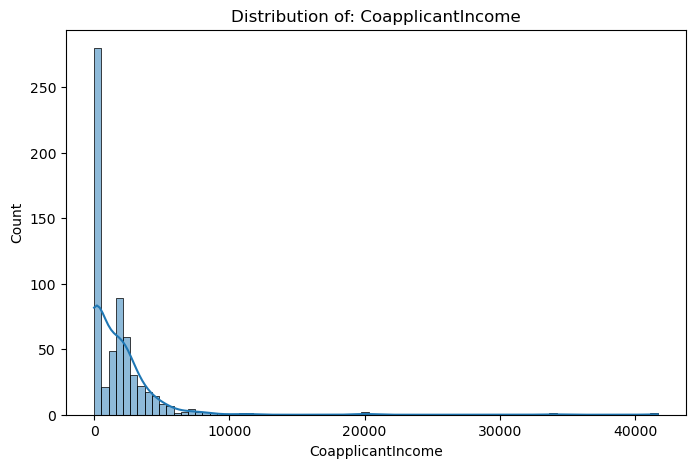

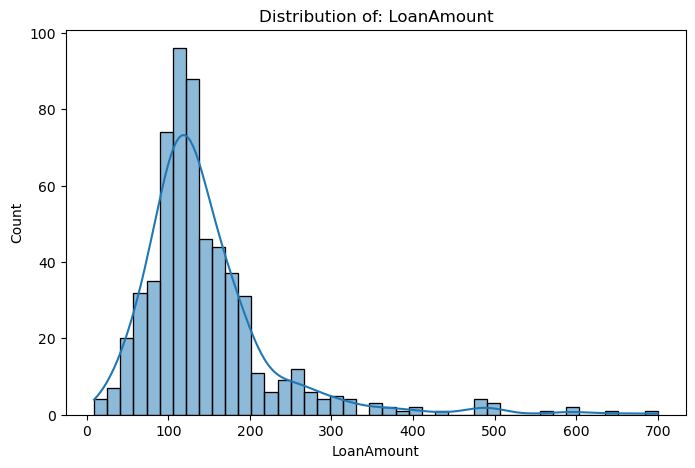

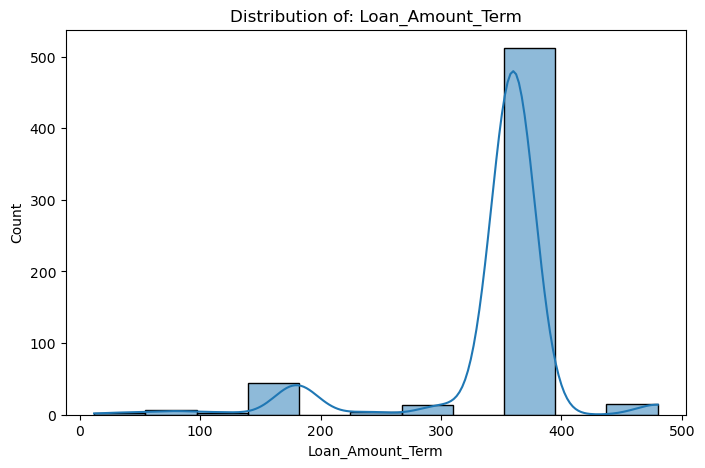

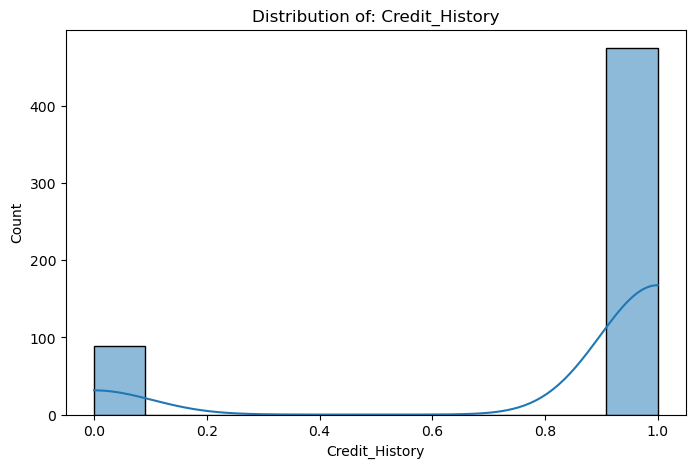

In [218]:
# analysis the distribution of numeric variables
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.title(f"Distribution of: {col}")
    sns.histplot(data=loan_data, x=loan_data[col], kde=True)
    plt.show()
    plt.close()

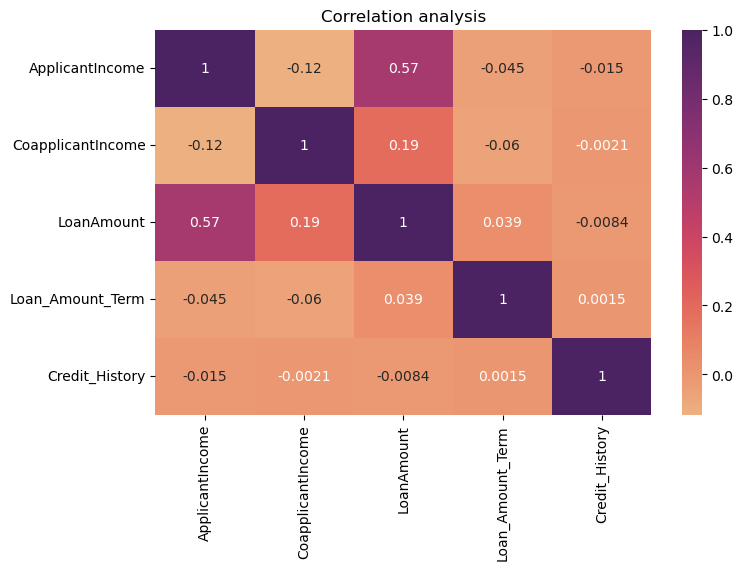

In [219]:
# correlation analysis for numeric variables
loan_corr = loan_data.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(loan_corr, cmap='flare', annot=True)
plt.title("Correlation analysis")
plt.show()
plt.close()

In [220]:
# Exemple : Feature Engineering
loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['Loan_to_Income_Ratio'] = loan_data['LoanAmount'] / (loan_data['Total_Income'] + 1e-6)

In [221]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_to_Income_Ratio
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021015
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.022000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024287
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023500


/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


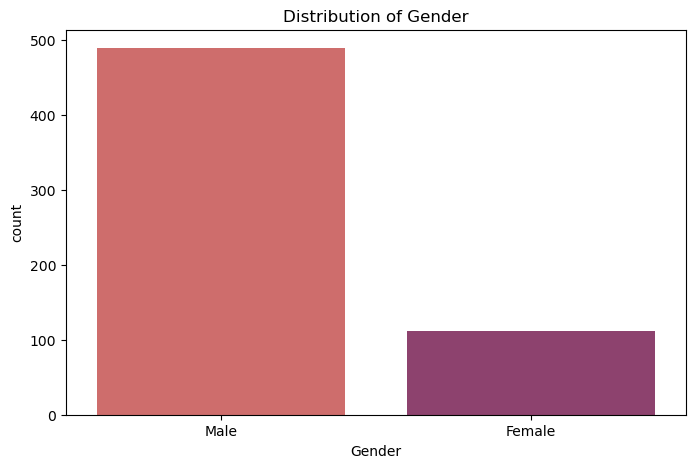

/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


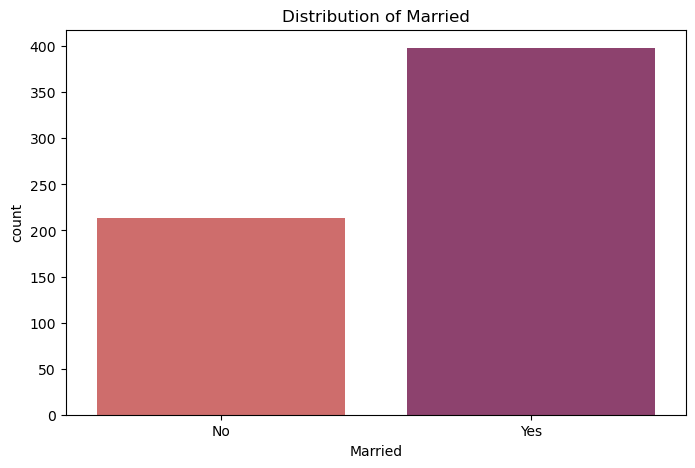

/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


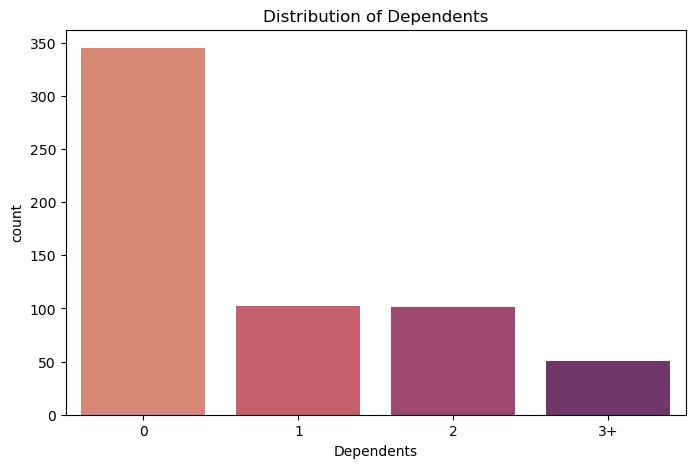

/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


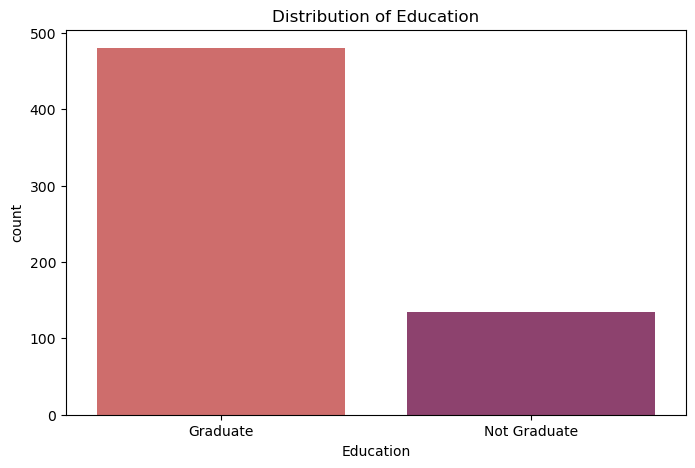

/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


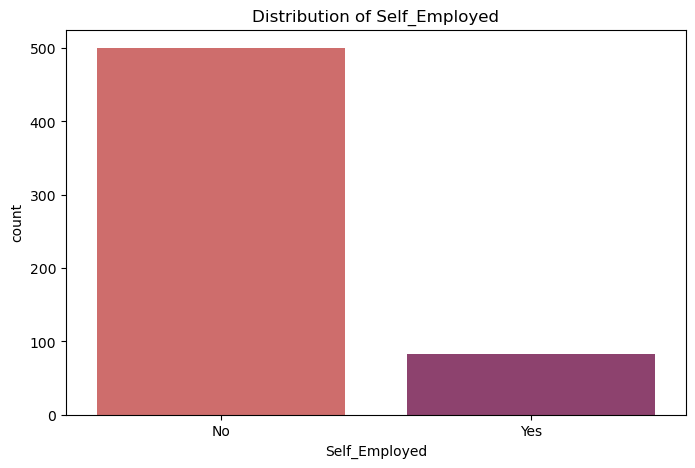

/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


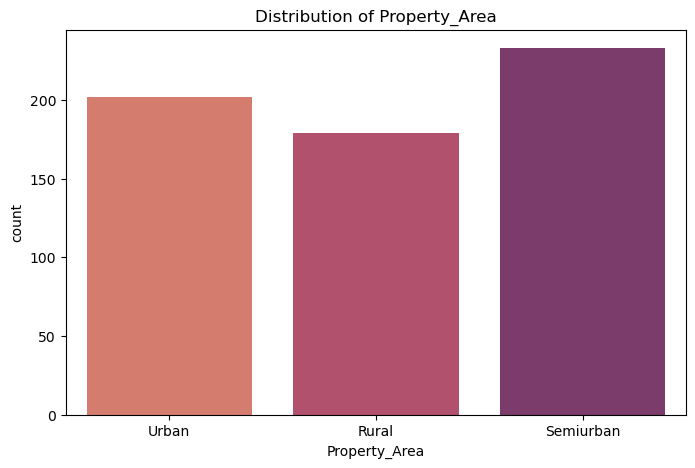

/tmp/ipykernel_18023/315114748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=loan_data, palette="flare")


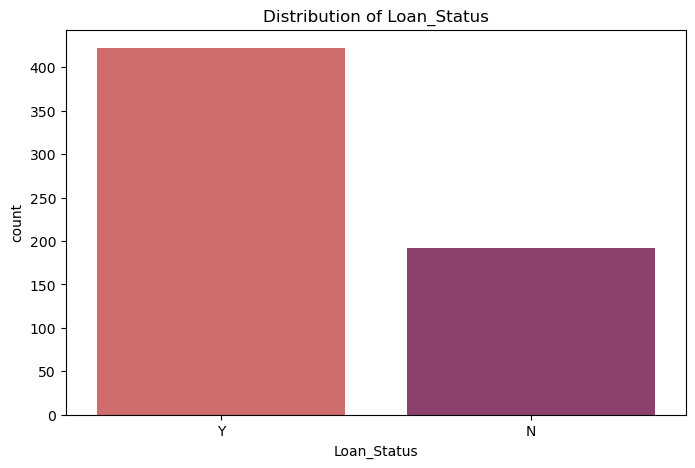

In [222]:
# analyse des variables catégorielles
for col in categoric_columns:
    plt.figure(figsize=(8, 5))
    plt.title(f"Distribution of {col}")
    sns.countplot(x=col, data=loan_data, palette="flare")
    plt.show()
    plt.close()

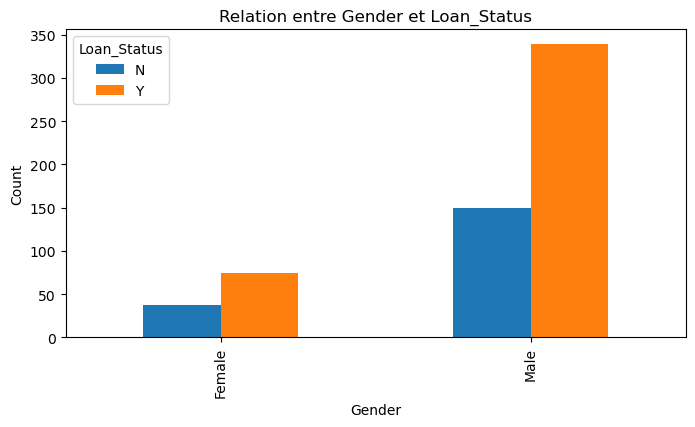

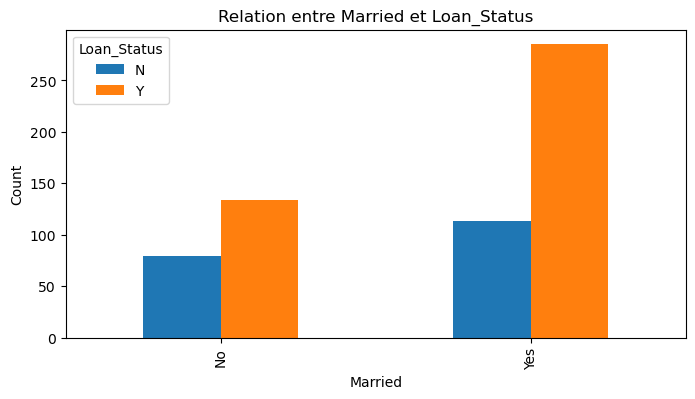

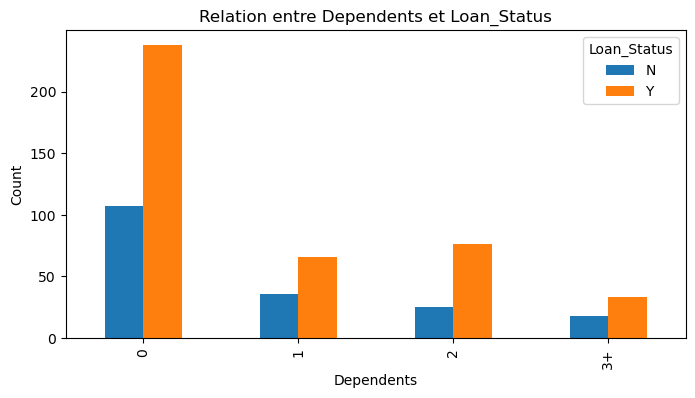

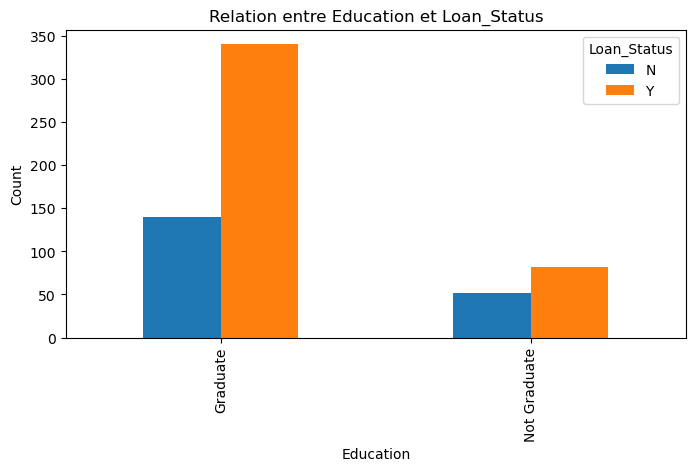

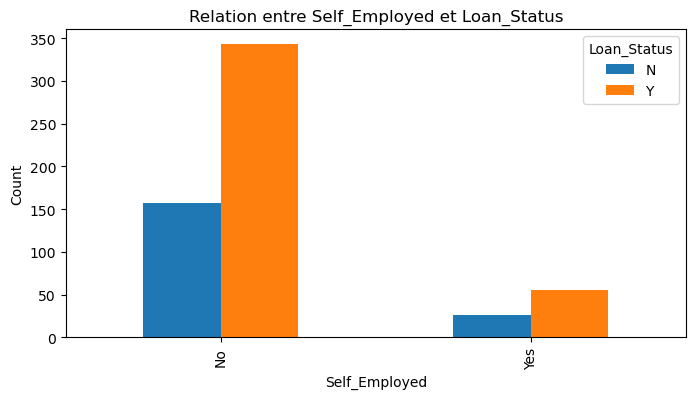

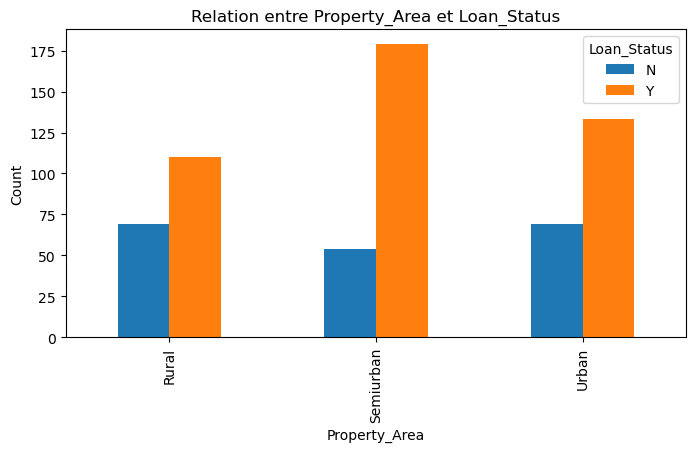

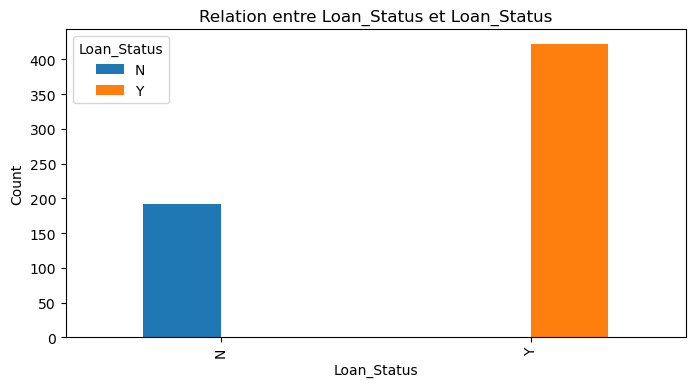

In [223]:
# analyse de chaque variable categorielles sur la variable cible
for col in categoric_columns:
    cross_tab = pd.crosstab(loan_data[col], loan_data['Loan_Status'])
    cross_tab.plot(kind="bar", figsize=(8, 4))
    plt.title(f"Relation entre {col} et Loan_Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [224]:
# test de chi2 pour voir si 2 variables sont indépendantes ou non
from scipy.stats import chi2_contingency

# Exemple : Tester l'indépendance entre "Married" et "Loan_Status"
contingency_table = pd.crosstab(loan_data['Married'], loan_data['Loan_Status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p_value}")
if p_value < 0.05:
    print(" -> Les variables sont dépendantes.")
else:
    print(" -> Les variables sont indépendantes.")

p-value: 0.03439381301579988
 -> Les variables sont dépendantes.


In [225]:
from scipy.stats import chi2_contingency

# Exemple : Tester l'indépendance entre "Married" et "Loan_Status"
contingency_table = pd.crosstab(loan_data['Gender'], loan_data['Self_Employed'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"p-value: {p_value}")
if p_value < 0.05:
    print(" -> Les variables sont dépendantes.")
else:
    print(" -> Les variables sont indépendantes.")

p-value: 0.9388088831667365
 -> Les variables sont indépendantes.


## 2) Data relationships analysis

In [226]:
from scipy.stats import f_oneway

# Exemple : Test ANOVA pour ApplicantIncome par Education
categories = loan_data['Education'].unique()
groups = [loan_data[loan_data['Education'] == cat]['ApplicantIncome'] for cat in categories]
f_stat, p_value = f_oneway(*groups)
print(f"p-value (ANOVA) : {p_value}")
if p_value < 0.05:
    print(" -> Les moyennes diffèrent significativement entre les groupes.")
else:
    print(" -> Pas de différence significative.")

p-value (ANOVA) : 0.00046836354511225976
 -> Les moyennes diffèrent significativement entre les groupes.


In [227]:
from scipy.stats import f_oneway

# Exemple : Test ANOVA pour ApplicantIncome par Education
categories = loan_data['Self_Employed'].unique()
groups = [loan_data[loan_data['Self_Employed'] == cat]['Credit_History'] for cat in categories]
f_stat, p_value = f_oneway(*groups)
print(f"p-value (ANOVA) : {p_value}")
if p_value < 0.05:
    print(" -> Les moyennes diffèrent significativement entre les groupes.")
else:
    print(" -> Pas de différence significative.")

p-value (ANOVA) : nan
 -> Pas de différence significative.


# Data cleaning

## 1) Handling missing values

In [228]:
loan_data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
Total_Income             0
Loan_to_Income_Ratio    22
dtype: int64

In [229]:
from scipy.stats import ttest_ind

# Séparer les données complètes et incomplètes
complete_data = loan_data.dropna()  # Lignes sans valeurs manquantes
incomplete_data = loan_data[loan_data.isnull().any(axis=1)]  # Lignes avec au moins une valeur manquante

# Tester pour chaque variable si les moyennes diffèrent significativement
for column in loan_data.select_dtypes(include=['float64', 'int64']).columns:
    if complete_data[column].notnull().any() and incomplete_data[column].notnull().any():
        stat, p_value = ttest_ind(
            complete_data[column].dropna(),
            incomplete_data[column].dropna(),
            equal_var=False  # Welch's t-test (variances non égales)
        )
        print(f"Variable: {column}, p-value: {p_value}")
        if p_value < 0.05:
            print(" -> Les données NE SONT PAS MCAR (différence significative).")
            print()
        else:
            print(" -> Les données semblent être MCAR.")
            print()

Variable: ApplicantIncome, p-value: 0.7970117923568036
 -> Les données semblent être MCAR.

Variable: CoapplicantIncome, p-value: 0.6026629515530817
 -> Les données semblent être MCAR.

Variable: LoanAmount, p-value: 0.40252930338187676
 -> Les données semblent être MCAR.

Variable: Loan_Amount_Term, p-value: 0.9700083414239493
 -> Les données semblent être MCAR.

Variable: Credit_History, p-value: 0.10173384994461425
 -> Les données semblent être MCAR.

Variable: Total_Income, p-value: 0.6245398924242884
 -> Les données semblent être MCAR.

Variable: Loan_to_Income_Ratio, p-value: 0.5423310583828754
 -> Les données semblent être MCAR.



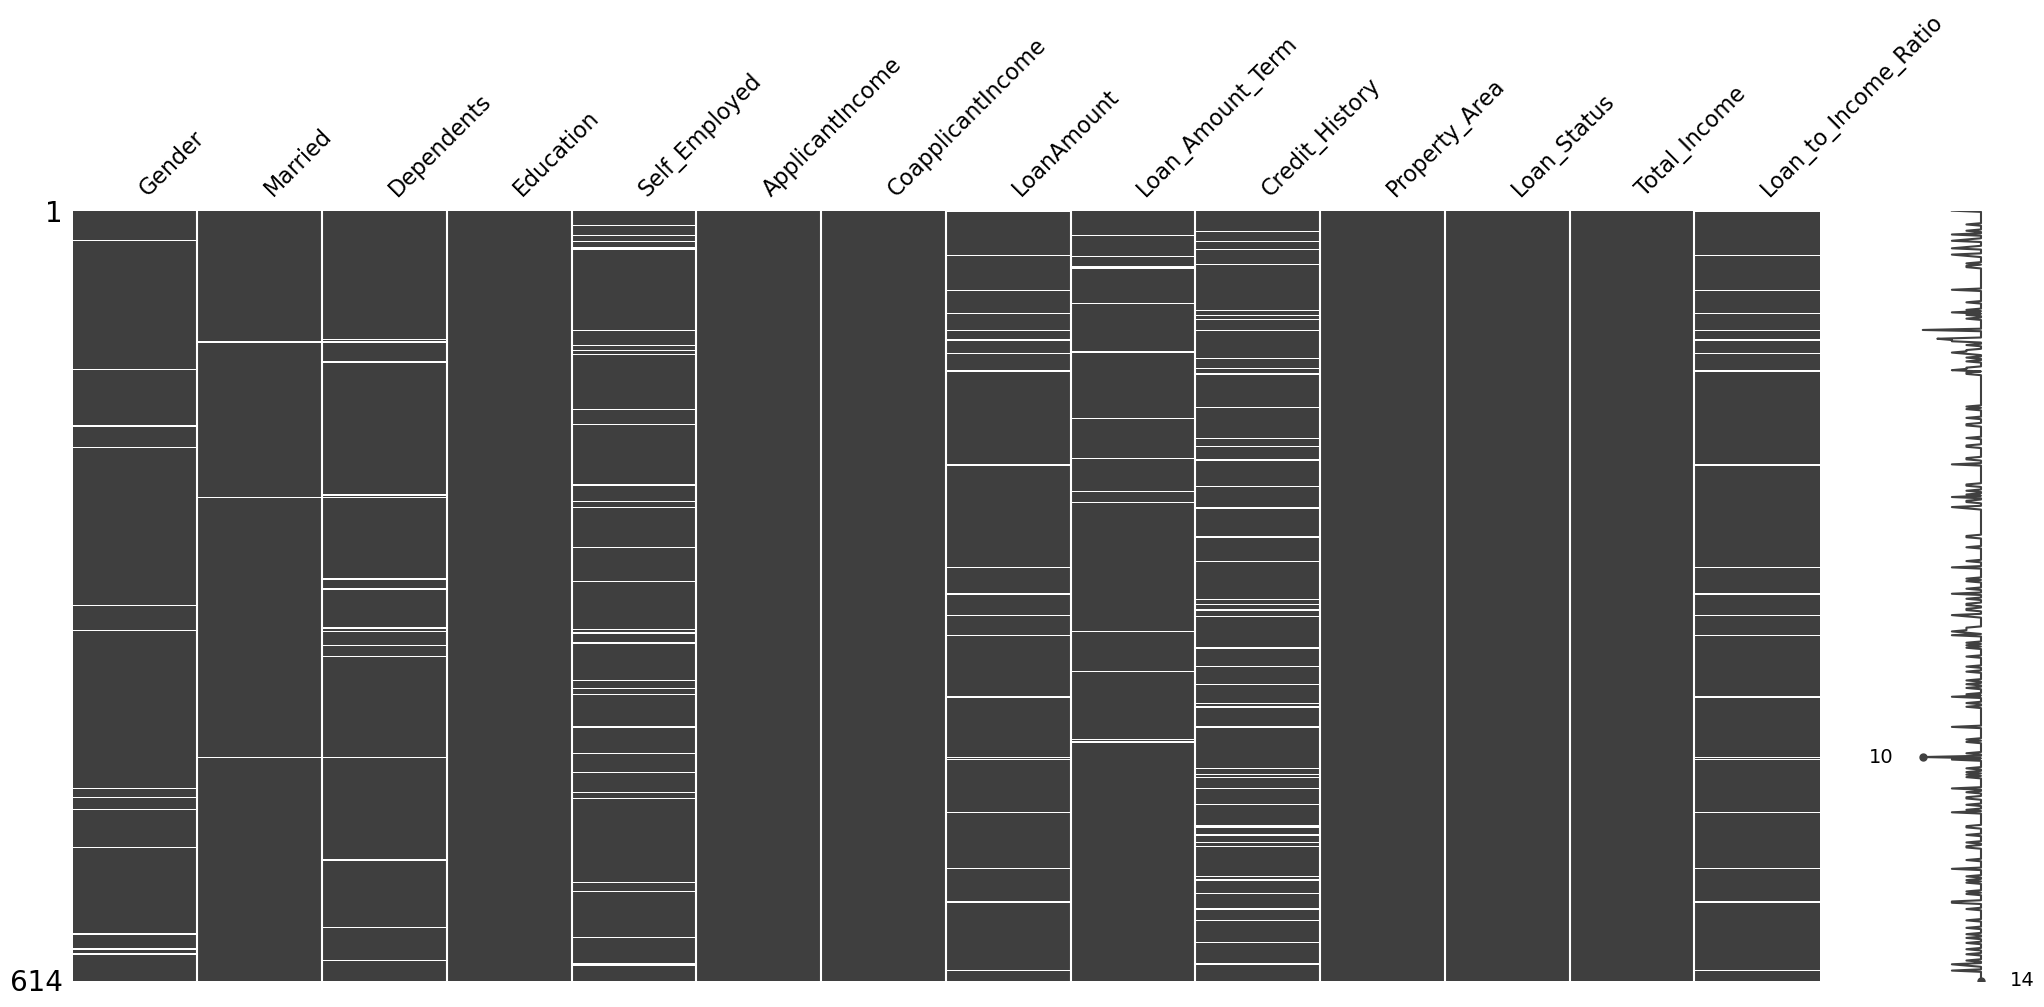

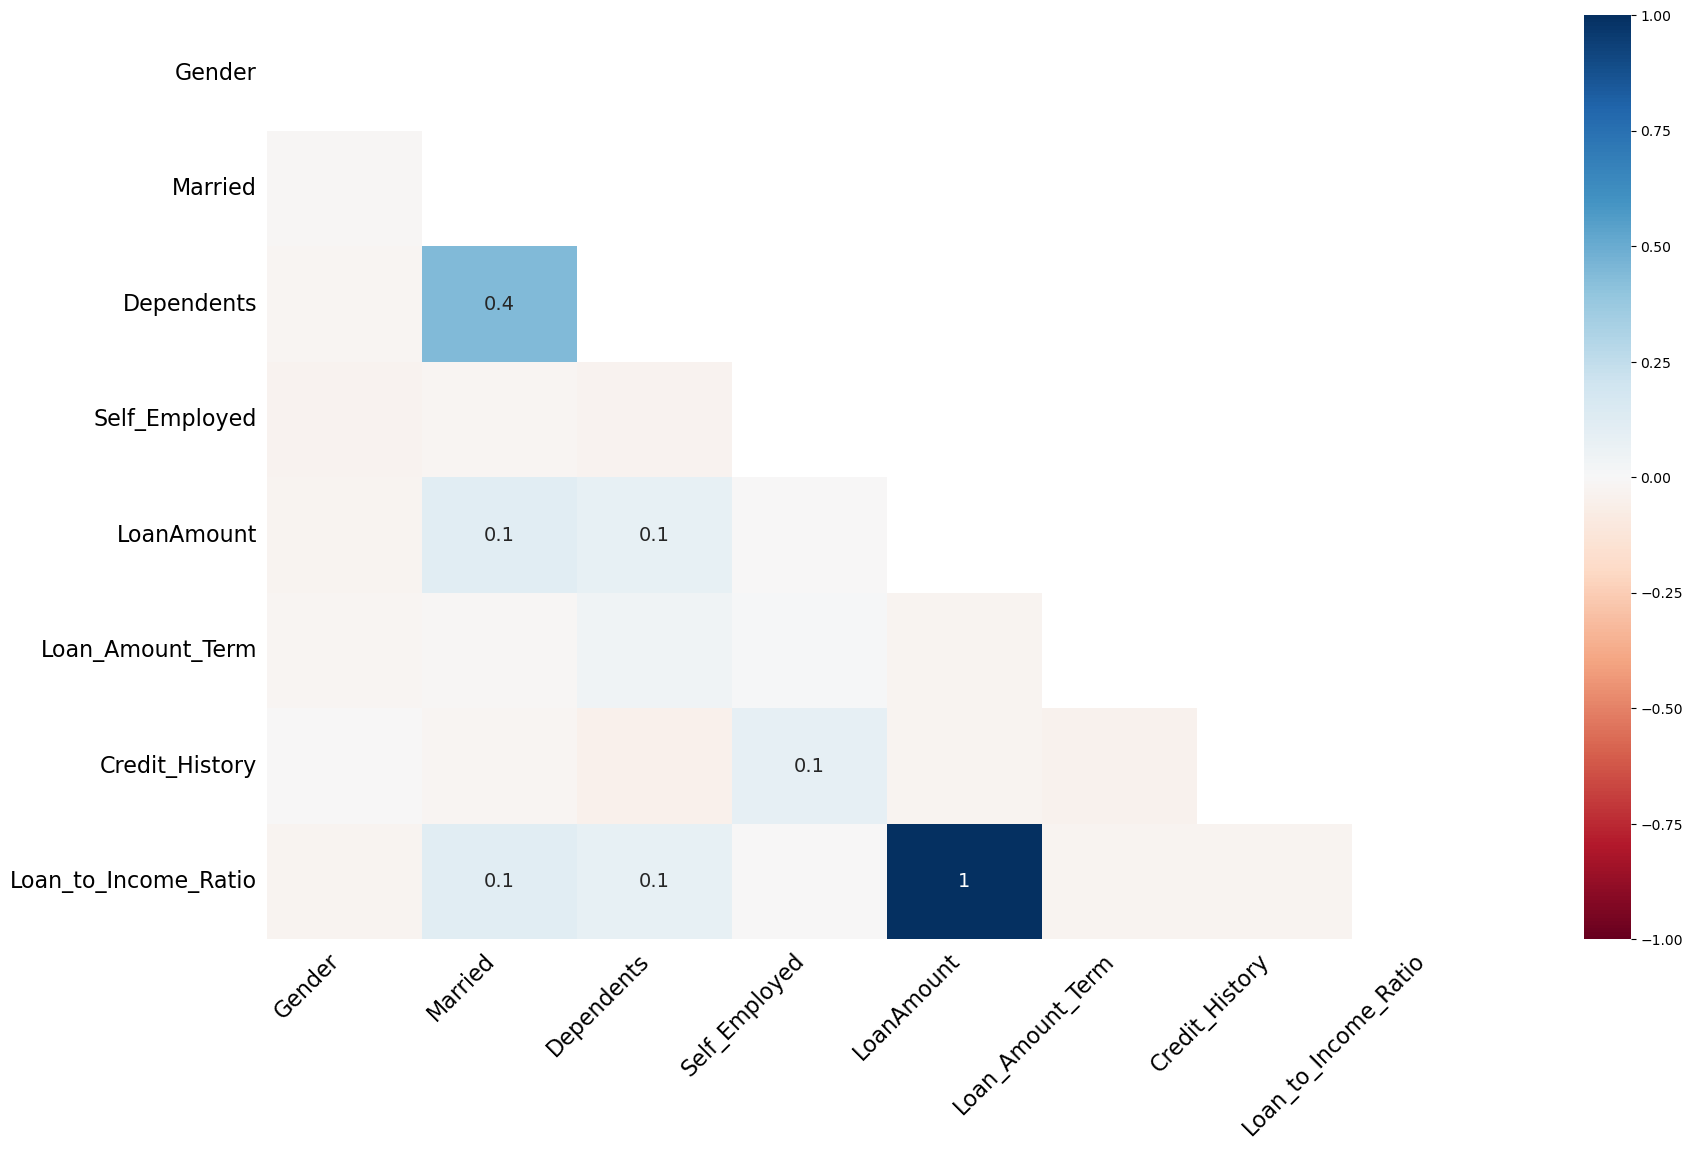

In [230]:
import missingno as msno

# Visualisation des motifs de données manquantes
msno.matrix(loan_data)
plt.show()

# Heatmap des corrélations entre les variables avec des données manquantes
msno.heatmap(loan_data)
plt.show()

In [231]:
# Exemple : Imputation par mode pour Gender
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [232]:
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [233]:
# imputations basés sur la relation entre dependents et married
# Exemple : Imputation conditionnelle pour Married
loan_data['Married'] = loan_data.apply(
    lambda row: 'Yes' if row['Dependents'] != '0' else row['Married'], axis=1
)
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [234]:
# lier à Loan_Status
# Imputation basée sur Loan_Status
credit_history_by_loan_status = loan_data.groupby('Loan_Status')['Credit_History'].apply(lambda x: x.mode()[0])
loan_data['Credit_History'] = loan_data.apply(
    lambda row: credit_history_by_loan_status[row['Loan_Status']] if pd.isnull(row['Credit_History']) else row['Credit_History'], axis=1
)

In [235]:
loan_data['CoapplicantIncome'] = loan_data['CoapplicantIncome'].fillna(loan_data['CoapplicantIncome'].mean())

In [236]:
from sklearn.linear_model import LinearRegression

# Séparer les données complètes et incomplètes
complete_data = loan_data.dropna(subset=['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'])
incomplete_data = loan_data[loan_data['LoanAmount'].isnull()]

# Définir X (features) et y (cible)
X = complete_data[['ApplicantIncome', 'CoapplicantIncome']]
y = complete_data['LoanAmount']

# Créer et entraîner le modèle de régression
model = LinearRegression()
model.fit(X, y)

# Prédire les valeurs manquantes
missing_indices = incomplete_data.index
loan_data.loc[missing_indices, 'LoanAmount'] = model.predict(incomplete_data[['ApplicantIncome', 'CoapplicantIncome']])

In [237]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])

In [238]:
# Remplir les valeurs manquantes de Self_Employed
def impute_self_employed(row):
    if pd.isnull(row['Self_Employed']):
        if row['Credit_History'] == 0:
            return np.random.choice(['No', 'Yes'], p=[0.8, 0.2])  # Proportions pour Credit_History = 0
        elif row['Credit_History'] == 1:
            return np.random.choice(['No', 'Yes'], p=[0.7, 0.3])  # Proportions pour Credit_History = 1
    return row['Self_Employed']

loan_data['Self_Employed'] = loan_data.apply(impute_self_employed, axis=1)

In [239]:
loan_data['Loan_to_Income_Ratio'] = loan_data['LoanAmount'] / (loan_data['Total_Income'] + 1e-6)

In [240]:
loan_data.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Total_Income            0
Loan_to_Income_Ratio    0
dtype: int64

## 2) Encoding categorical variables

In [241]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_to_Income_Ratio
0,Male,No,0,Graduate,No,5849,0.0,137.949946,360.0,1.0,Urban,Y,5849.0,0.023585
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,0.021015
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,0.022000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,0.024287
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,0.023500


In [242]:
loan_data.Self_Employed.value_counts()

Self_Employed
No     525
Yes     89
Name: count, dtype: int64

In [243]:
# Encodage des variables catégorielles
# Exemple : One-Hot Encoding pour Gender
loan_data = pd.get_dummies(loan_data, columns=['Gender'], drop_first=True)

# Exemple : Label Encoding pour Married
loan_data['Married'] = loan_data['Married'].map({'No': 0, 'Yes': 1})

# Exemple : Ordinal Encoding pour Dependents
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
loan_data['Dependents'] = loan_data['Dependents'].map(dependents_mapping)

# Exemple : Label Encoding pour Education
loan_data['Education'] = loan_data['Education'].map({'Not Graduate': 0, 'Graduate': 1})

# Exemple : Label Encoding pour Self_Employed
loan_data['Self_Employed'] = loan_data['Self_Employed'].map({'No': 0, 'Yes': 1})

# Exemple : One-Hot Encoding pour Property_Area
loan_data = pd.get_dummies(loan_data, columns=['Property_Area'], drop_first=True)

# Exemple : Label Encoding pour Loan_Status
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'N': 0, 'Y': 1})

In [244]:
loan_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Loan_to_Income_Ratio,Gender_Male,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849,0.0,137.949946,360.0,1.0,1,5849.0,0.023585,True,False,True
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0.021015,True,False,False
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,3000.0,0.022000,True,False,True
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0.024287,True,False,True
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,6000.0,0.023500,True,False,True


In [245]:
# MinMaxscaler
scaler = StandardScaler()

numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_Income']
loan_data[numeric_columns] = scaler.fit_transform(loan_data[numeric_columns])

In [246]:
loan_data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Loan_to_Income_Ratio,Gender_Male,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,0.072991,-0.554487,-0.098515,360.0,1.0,1,-0.182184,0.023585,True,False,True
1,1,1,1,0,-0.134412,-0.038732,-0.216661,360.0,1.0,0,-0.144684,0.021015,True,False,False
2,1,0,1,1,-0.393747,-0.554487,-0.952846,360.0,1.0,1,-0.623656,0.022000,True,False,True
3,1,0,0,0,-0.462062,0.251980,-0.311652,360.0,1.0,1,-0.322885,0.024287,True,False,True
4,0,0,1,0,0.097728,-0.554487,-0.062299,360.0,1.0,1,-0.158785,0.023500,True,False,True


## 3) Handling outliers

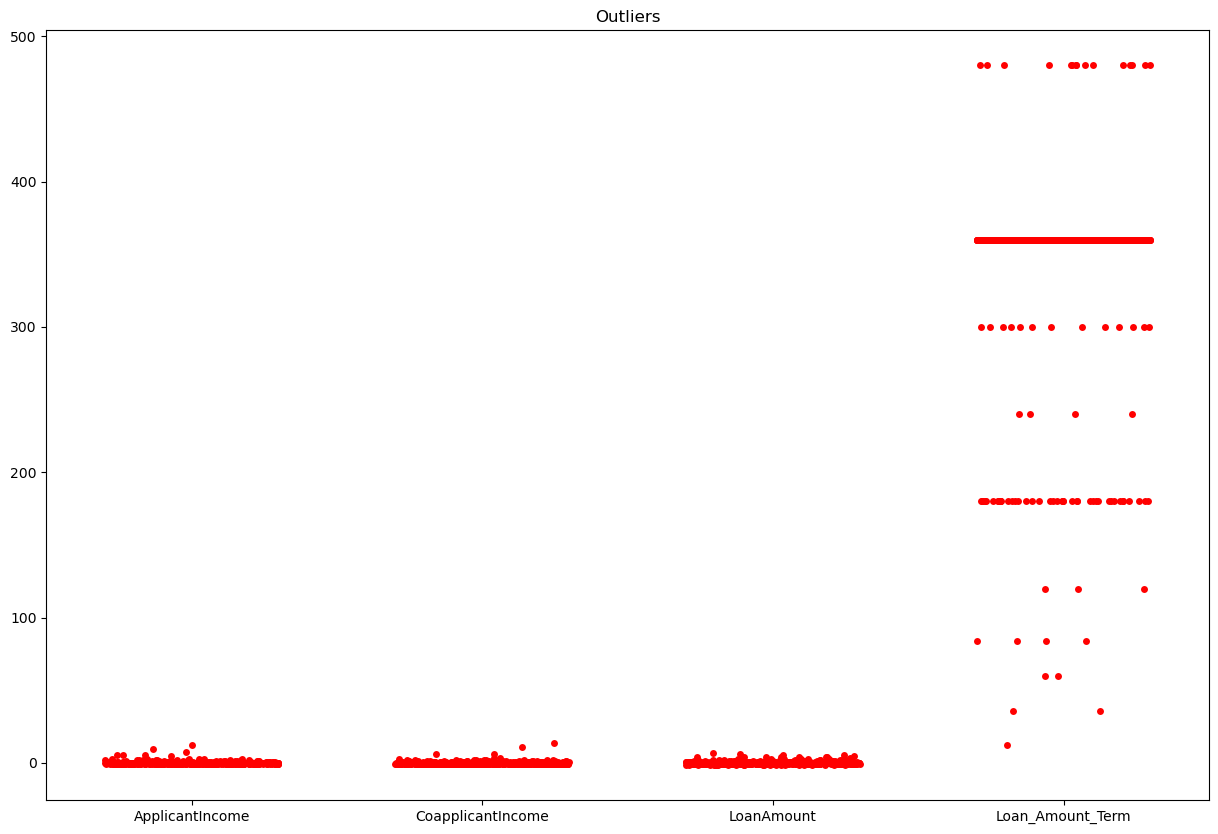

In [247]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Only variables that have outliers
outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

# Add outliers to the plot
sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

# Set the axis labels and title
plt.title("Outliers")

# Show the plot
plt.show()

In [249]:
# Features "Inputs" (X)
X = loan_data.drop(columns=['Loan_Status'])

# Target variable "Outputs" (Y)
y = loan_data['Loan_Status']

# Print the shapes of X and Y to verify the splitting
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (614, 14)
Shape of Y: (614,)


In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (491, 14)
Shape of X_test: (123, 14)
Shape of Y_train: (491,)
Shape of Y_test: (123,)


In [251]:
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree Classifier Model
from sklearn.ensemble import RandomForestClassifier # For Random Forest Classifier Model
from sklearn.neighbors import KNeighborsClassifier # For K-Nearest Neighbors Model
from sklearn.naive_bayes import GaussianNB,BernoulliNB 
from sklearn.linear_model import LogisticRegression

In [268]:
# Initialiser les listes pour stocker les scores
scoreListDT_Train = []
scoreListDT_Test = []

# Initialiser des variables pour suivre les meilleurs paramètres
best_params = {'max_depth': None, 'min_samples_leaf': None}
best_accuracy_test = 0

# Itérer sur différentes valeurs de max_depth
for i in range(1, 50):
    # Itérer sur différentes valeurs de min_samples_leaf
    for j in range(1, 5):
        # Créer un modèle DecisionTree avec les paramètres actuels
        Model1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)

        # Entraîner le modèle
        Model1.fit(X_train, y_train)

        # Calculer les scores d'entraînement et de test
        train_score = Model1.score(X_train, y_train)
        test_score = Model1.score(X_test, y_test)

        # Stocker les scores
        scoreListDT_Train.append(train_score)
        scoreListDT_Test.append(test_score)

        # Vérifier si ce modèle est le meilleur en termes de score de test
        if test_score > best_accuracy_test:
            best_accuracy_test = test_score
            best_params['max_depth'] = i
            best_params['min_samples_leaf'] = j

# Afficher les résultats
print(f"Decision Tree best accuracy (Training): {max(scoreListDT_Train)*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {max(scoreListDT_Test)*100:.2f}%")
print(f"Meilleurs paramètres : max_depth = {best_params['max_depth']}, min_samples_leaf = {best_params['min_samples_leaf']}")

Decision Tree best accuracy (Training): 100.00%
Decision Tree best accuracy (Testing): 83.74%
Meilleurs paramètres : max_depth = 4, min_samples_leaf = 2


In [286]:
Model1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, max_features=2)

# Entraîner le modèle
Model1.fit(X_train, y_train)

# Calculer les scores d'entraînement et de test
train_score = Model1.score(X_train, y_train)
test_score = Model1.score(X_test, y_test)

print(f"{test_score*100:.2f}")

65.04


In [269]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'max_depth': range(1, 50),
    'min_samples_leaf': range(1, 5),
    'max_features': [2]
}

# Créer un modèle DecisionTree
Model1 = DecisionTreeClassifier()

# Configurer GridSearchCV
grid_search = GridSearchCV(Model1, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Effectuer la recherche sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score de validation croisée :", grid_search.best_score_)

Meilleurs paramètres : {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 4}
Meilleur score de validation croisée : 0.792166563595135


/home/tommy/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [254]:
# Initialize lists to store training and testing accuracies
scoreListGNB_Train = []
scoreListGNB_Test = []

# Iterate over different values of var_smoothing
for i in range(1, 9):
    # Create a Gaussion Naive Bayes Model with the different values of var_smoothing
    Model3_1 = GaussianNB(var_smoothing=10**(-i))

    # Fit the model on the training data
    Model3_1.fit(X_train, y_train)
    
    # Calculate and store the training accuracy
    scoreListGNB_Train.append(Model3_1.score(X_train, y_train))
    
    # Calculate and store the testing accuracy
    scoreListGNB_Test.append(Model3_1.score(X_test, y_test))

# Find the maximum accuracy for both training and testing
GNB_Accuracy_Train = max(scoreListGNB_Train) 
GNB_Accuracy_Test = max(scoreListGNB_Test)

# Print the best accuracies achieved
print(f"Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train*100:.2f}%")
print(f"Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test*100:.2f}%")

Gaussian Naive Bayes best accuracy (Training): 79.63%
Gaussian Naive Bayes best accuracy (Testing): 82.93%


In [255]:
# Create a Bernoulli Naive Bayes Model
Model3_2= BernoulliNB()

# Fit the model on the training data
Model3_2.fit(X_train, y_train)
    
# Calculate and store the training accuracy
BNB_Accuracy_Train = Model3_2.score(X_train, y_train)
    
# Calculate and store the testing accuracy
BNB_Accuracy_Test = Model3_2.score(X_test, y_test)

# Print the best accuracies achieved
print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%")

Bernoulli Naive Bayes best accuracy (Training): 80.45%
Bernoulli Naive Bayes best accuracy (Testing): 82.93%


In [285]:
# Augmenter max_iter et utiliser le solver 'lbfgs'
logic = LogisticRegression(solver='lbfgs', max_iter=1000)

# Entraîner le modèle
logic.fit(X_train, y_train)

# Évaluer le modèle
score = logic.score(X_test, y_test)
print(f"Accuracy: {score * 100:.2f}%")

Accuracy: 83.74%


In [287]:
from sklearn.ensemble import RandomForestClassifier

Model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
Model2.fit(X_train, y_train)

train_score = Model2.score(X_train, y_train)
test_score = Model2.score(X_test, y_test)

print(f"Random Forest Training Score: {train_score*100:.2f}%")
print(f"Random Forest Testing Score: {test_score*100:.2f}%")

Random Forest Training Score: 92.87%
Random Forest Testing Score: 82.93%


In [289]:
from sklearn.ensemble import VotingClassifier
# Créer le Voting Classifier avec soft voting
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic', logic),
        ('random_forest', Model2),
        ('bernoulli_nb', Model3_2)
    ],
    voting='soft'  # Utiliser 'hard' si vous préférez un vote majoritaire simple
)

In [290]:
# Entraîner le modèle ensemble
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(max_iter=1000)),
                             ('random_forest',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('bernoulli_nb', BernoulliNB())],
                 voting='soft')

In [291]:
# Faire des prédictions
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)

# Calculer les scores d'exactitude
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Afficher les résultats
print(f"Ensemble Model Accuracy (Training): {train_accuracy * 100:.2f}%")
print(f"Ensemble Model Accuracy (Testing): {test_accuracy * 100:.2f}%")

# Rapport de classification
print("Classification Report (Testing):")
print(classification_report(y_test, y_test_pred))

Ensemble Model Accuracy (Training): 81.26%
Ensemble Model Accuracy (Testing): 82.93%
Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

